#                        **RESTAURANT RECOMMENDATION SYSTEM**


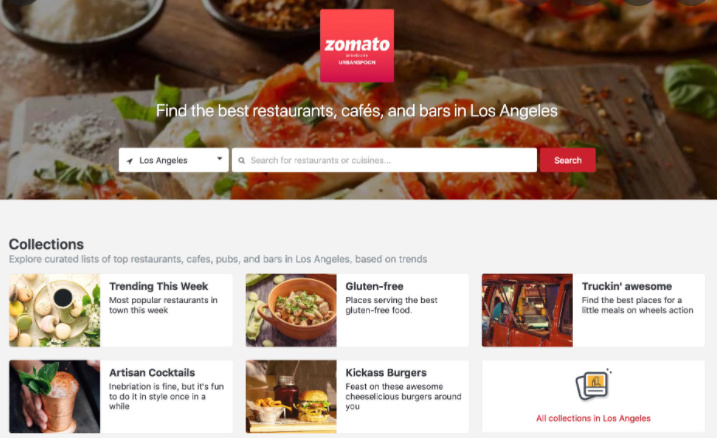

***IMPORTING ALL THE REQUIRED LIBRARIES***





In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt         # For Exploratory Data Analysis
%matplotlib inline
import seaborn as sns           # For Exploratory Data Analysis
import plotly                             # For Exploratory Data Analysis
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim     # geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources
import folium                         # To depict the map
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS                      # To visualize the most and least popular words
from warnings import filterwarnings                 # To ignore the unnecessary warnings.
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
!pip install pyyaml==5.4.1  #PyYAML is a YAML parser and emitter for Python. Using the PyYAML module, we can perform various actions such as reading and writing complex configuration YAML files, serializing and persisting YMAL data. Use it to convert the YAML file into a Python dictionary

     |████████████████████████████████| 636 kB 4.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


***EXTRACTING THE DATASET FROM GOOGLE COLAB***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')     # Fetching the data from google drive

  ***GETTING THE FIRST FIVE ROWS FROM DATASET***

In [ ]:
df.head()  # head() gives the first 5 rows by default

url  ... listed_in(city)
0  https://www.zomato.com/bangalore/jalsa-banasha...  ...    Banashankari
1  https://www.zomato.com/bangalore/spice-elephan...  ...    Banashankari
2  https://www.zomato.com/SanchurroBangalore?cont...  ...    Banashankari
3  https://www.zomato.com/bangalore/addhuri-udupi...  ...    Banashankari
4  https://www.zomato.com/bangalore/grand-village...  ...    Banashankari

[5 rows x 17 columns]

***TO GET AN ACCESS TO RETRIEVE THE DATASET FROM GOOGLE DRIVE WE NEED TO WRITE THE CODE AS BELOW***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape    # shape gives the number of rows and columns that the dataset has

(51717, 17)

In [ ]:
df.info()   # info gives the detailed information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.isnull().sum()  # Depicts if there are any null values in our dataset

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.describe()   # describe, describes the data by calculating the mean, std, min, 25%, 50%, 75% and max

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [ ]:
df.columns    # columns give the name of the features from the dataset

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.dropna(axis=0, subset=['location'], inplace=True)      #dropna drops the null values from the given particular feature

In [ ]:
len(df['location'].unique())      # unique() gives the data of the unique rows of that particular column

93

In [ ]:
locations = pd.DataFrame({'Name':df['location'].unique()})

In [ ]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [ ]:
geolocator = Nominatim(user_agent='app')

In [ ]:
lat = []
lon = []
for location in locations['Name']:
  location = geolocator.geocode(location)
  if location is None:
    lat.append(np.nan)
    lon.append(np.nan)
  else:
    lat.append(location.latitude)
    lon.append(location.longitude)

In [ ]:
locations['lat'] = lat
locations['lon'] = lon

In [ ]:
locations.head()

Name        lat        lon
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [ ]:
rest_locat = pd.DataFrame(df['location'].value_counts().reset_index())

In [ ]:
rest_locat.columns = ['Name', 'count']
rest_locat.head()

Name  count
0                    BTM   5124
1                    HSR   2523
2  Koramangala 5th Block   2504
3               JP Nagar   2235
4             Whitefield   2144

In [ ]:
print(locations.shape)
print(rest_locat.shape)

(93, 3)
(93, 2)


In [ ]:
rest_locat = rest_locat.merge(locations, on='Name', how='left').dropna()
rest_locat.head()

Name  count        lat         lon
0                    BTM   5124  45.954851 -112.496595
1                    HSR   2523  18.147500   41.538889
2  Koramangala 5th Block   2504  12.934377   77.628415
3               JP Nagar   2235  12.265594   76.646540
4             Whitefield   2144  44.373058  -71.611858

In [ ]:
rest_locat['count'].max()

5124

***DEFINING FUNCTION TO GENERATE THE MAP OF BANGALORE CITY***

In [ ]:
def generateBaseMap(default_location = [12.97, 77.59], default_zoom_start=12):
  base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
  return base_map

In [ ]:
basemap = generateBaseMap()

In [ ]:
basemap

In [ ]:
#rest_locat[['lat', 'lon', 'count']]
rest_locat_data = [[row['lat'], row['lon'], row['count']] for index, row in rest_locat.iterrows()]

***Heat Map :  Heat map make it easy to visualize complex data and understand it at a glance***

In [ ]:
HeatMap(rest_locat_data).add_to(basemap)

In [ ]:
basemap

***Marker clusters can be a good way to simply a map containing many markers. When the map is zoomed out nearby markers are combined together into a cluster, which is separated out when the map zoom level is closer***

In [ ]:
FastMarkerCluster(data=rest_locat[['lat', 'lon', 'count']].values.tolist()).add_to(basemap)

In [ ]:
basemap

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df.dropna(axis=0, subset=['rate'], inplace=True)

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def split(x):
  return x.split('/')[0]

In [ ]:
df['rating'] = df['rate'].apply(split)
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df.replace('NEW', 0, inplace=True)
df.replace('-', 0, inplace=True)

In [ ]:
df['rating'] = pd.to_numeric(df['rating'])
df.groupby(['location'])['rating'].mean().sort_values(ascending=False)

location
Lavelle Road             4.042886
St. Marks Road           4.017201
Koramangala 3rd Block    3.978756
Sankey Road              3.965385
Church Street            3.963091
                           ...   
Electronic City          3.041909
Bommanahalli             2.926752
Hebbal                   2.880000
North Bangalore          2.385714
West Bangalore           2.020000
Name: rating, Length: 92, dtype: float64

In [ ]:
df.groupby(['location'])['rating'].mean()

location
BTM                  3.296128
Banashankari         3.373292
Banaswadi            3.362926
Bannerghatta Road    3.271677
Basavanagudi         3.478185
                       ...   
West Bangalore       2.020000
Whitefield           3.384170
Wilson Garden        3.257635
Yelahanka            3.640000
Yeshwantpur          3.502679
Name: rating, Length: 92, dtype: float64

In [ ]:
avg_rating = df.groupby(['location'])['rating'].mean().values

In [ ]:
loc = df.groupby(['location'])['rating'].mean().index

In [ ]:
geolocator = Nominatim(user_agent='app')

In [ ]:
lat = []
lon = []
for location in loc:
  location = geolocator.geocode(location)
  if location is None:
    lat.append(np.nan)
    lon.append(np.nan)
  else:
    lat.append(location.latitude)
    lon.append(location.longitude)

In [ ]:
rating = pd.DataFrame()
rating['location'] = loc
rating['lat'] = lat
rating['lon'] = lon
rating['avg_rating'] = avg_rating

In [ ]:
rating.head()

location        lat         lon  avg_rating
0                BTM  45.954851 -112.496595    3.296128
1       Banashankari  15.887678   75.704678    3.373292
2          Banaswadi  13.014162   77.651854    3.362926
3  Bannerghatta Road  12.938943   77.602170    3.271677
4       Basavanagudi  12.941726   77.575502    3.478185

In [ ]:
rating.isna().sum()

location      0
lat           1
lon           1
avg_rating    0
dtype: int64

In [ ]:
rating = rating.dropna()

In [ ]:
rating_data = [[rating['lat'], rating['lon'], rating['avg_rating']] for index, row in rest_locat.iterrows()]

HeatMap(rating_data).add_to(basemap)
basemap

***SUPPOSE, WE WANT DATA OF THE CUISINES RELATED TO NORTH INDIAN...***

In [ ]:
df2 = df[df['cuisines'] == 'North Indian']
df2.head()

url  ... rating
5   https://www.zomato.com/bangalore/timepass-dinn...  ...    3.8
50  https://www.zomato.com/bangalore/petoo-banasha...  ...    3.7
72  https://www.zomato.com/bangalore/spicy-tandoor...  ...    0.0
87  https://www.zomato.com/bangalore/krishna-sagar...  ...    3.5
94  https://www.zomato.com/bangalore/nandhini-delu...  ...    2.6

[5 rows x 18 columns]

In [ ]:
north_India = df2.groupby('location')['url'].count().reset_index()
north_India.columns = ['Name', 'count']
north_India.head()

Name  count
0                BTM    274
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [ ]:
north_India = north_India.merge(locations, on='Name', how='left').dropna()

In [ ]:
basemap = generateBaseMap()
HeatMap(north_India[['lat', 'lon', 'count']].values.tolist()).add_to(basemap)

In [ ]:
basemap     # The below basemap will depict the restaurants that has North Indian Food.

In [ ]:
def Heatmap_Zone(zone):
  df3 = df[df['cuisines']==zone]
  df_zone = df3.groupby(['location'], as_index=False)['url'].agg('count')
  df_zone.columns = ['Name', 'count']
  df_zone = df_zone.merge(locations, on='Name', how='left').dropna()
  basemap = generateBaseMap()
  HeatMap(df_zone[['lat', 'lon', 'count']].values.tolist()).add_to(basemap)
  return basemap

In [ ]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
Heatmap_Zone('Street Food')     # Below Map will illustrate the location whre the user can get the best street food

In [ ]:
df.shape

(43942, 18)

In [ ]:
df2 = df.copy()     # copy helps to copy the data from one dataframe to another

In [ ]:
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})    # rename helps to rename the columns
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'rating'],
      dtype='object')

In [ ]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',' , '.'))   # replace, replaces the value in a row
df['cost'] = df['cost'].astype(float)

In [ ]:
df.name = df.name.apply(lambda x: x.title())
df.online_order.replace(('Yes', 'No'), (True, False), inplace=True)
df.book_table.replace(('Yes', 'No'), (True, False), inplace=True)

In [ ]:
df.shape

(43942, 18)

In [ ]:
def Encode(data):
  for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes', 'rating'])]:
    data[column] = data[column].factorize()[0]
  return data
Zom_df = Encode(df.copy())
Zom_df.head()

url  address  name  online_order  ...  menu_item type  city  rating
0    0        0     0             0  ...          0    0     0     4.1
1    1        1     1             0  ...          0    0     0     4.1
2    2        2     2             0  ...          0    0     0     3.8
3    3        3     3             1  ...          0    0     0     3.7
4    4        4     4             1  ...          0    0     0     3.8

[5 rows x 18 columns]

***TIME TO PERFORM EXPLORATORY DATA ANALYSIS***

In [ ]:
labels = ['Accepted', 'Not Accepted']
values = df['online_order'].value_counts()
colors = ['mediumslateblue', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])     # Pie chart for "Home Delivery Available Or Not"
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title='Home Delivery Available?', titlefont={'size': 30})
fig.show()

In [ ]:
labels = ['Yes', 'No']
values = df['book_table'].value_counts()
colors = ['blue', 'pink']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])    # Pie chart for "Table Booking Available Or Not"
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title='Table Booking Available?', titlefont={'size': 30})
fig.show()

In [ ]:
values = df['cuisines'].value_counts()[:20]
labels = values.index
text = values.index
fig = go.Figure(data=[go.Pie(values=values, labels=labels, hole=.3)])   # Pie chart for "Most Popular Cuisines"
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title='Most Popular Cuisines', titlefont={'size':30})
fig.show()

In [ ]:
fig = px.box(df, x='online_order', y='cost', color='online_order')
fig.update_layout(title='Cost Comparison For Online Order', titlefont={'size':30}, template='simple_white')   # Box Plot for "Cost Comparison For Online Order"
fig.show()

In [ ]:
df_upd = df.copy()
df_upd['update_dish_liked'] = df_upd['dish_liked'].apply(lambda x: x.split(',') if type(x)==str else [''])
rest = df_upd['rest_type'].value_counts()[:9].index

In [ ]:
df_upd.dropna(axis='index', subset=['rest_type'], inplace=True)
df_upd.dropna(axis='index', subset=['dish_liked'], inplace=True)

***CREATING FUNCTION FOR PRODUCING WORDCLOUD***

In [ ]:
def produce_wordcloud(rest):
  plt.figure(figsize=(12, 8))
  for i, restaurant in enumerate(rest):
    plt.subplot(3, 3, i+1)
    dishes=''
    data = df_upd[df_upd['rest_type']==restaurant]
    for word in data['dish_liked']:
      words = word.split()
      for i in range(len(words)):
        words[i] = words[i].lower()
      dishes = dishes+" ".join(words)+" "
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, stopwords=stopwords, width=1200, height=1200).generate(dishes)
    plt.imshow(wordcloud)
    plt.title(restaurant)
    plt.axis('off')

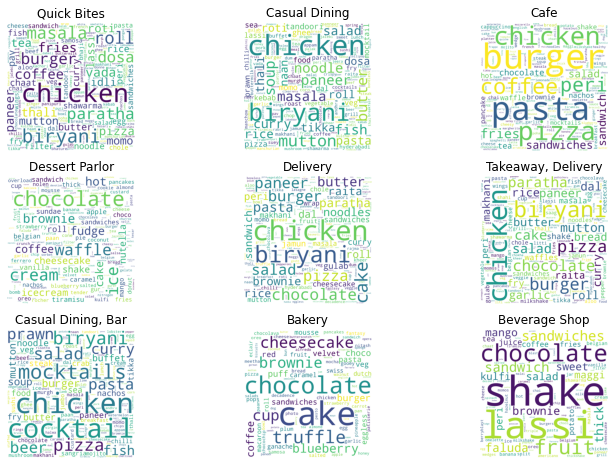

In [ ]:
stopwords = set(STOPWORDS)    # Stopwords creates the WordCloud which depicts the most and least popular food
produce_wordcloud(rest)

***MAKING FUNCTION FOR DEPICTING THE REVIEWS FOR A PARTICULAR RESTAURANT TYPE***

In [ ]:
def reviewwords(restaurant):
  dataset = df_upd[df_upd['rest_type']==restaurant]
  total_review = ' '
  for review in dataset['reviews_list']:
    review = review.lower()
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = re.sub('rated', ' ', review)
    review = re.sub('x', ' ', review)
    review = re.sub(' +', ' ', review)
    total_review = total_review + str(review)
  wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(STOPWORDS), min_font_size=10).generate(total_review)
  plt.figure(figsize=(12, 8))
  plt.imshow(wordcloud)
  plt.axis('off')

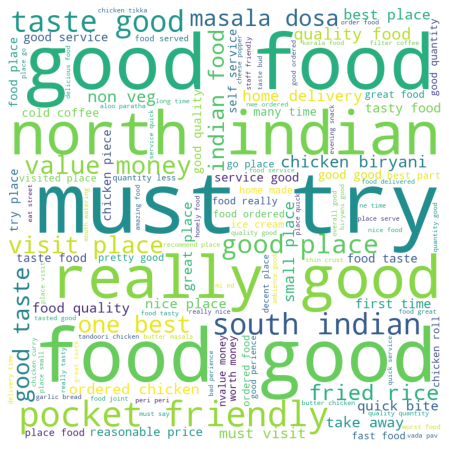

In [ ]:
reviewwords('Quick Bites')

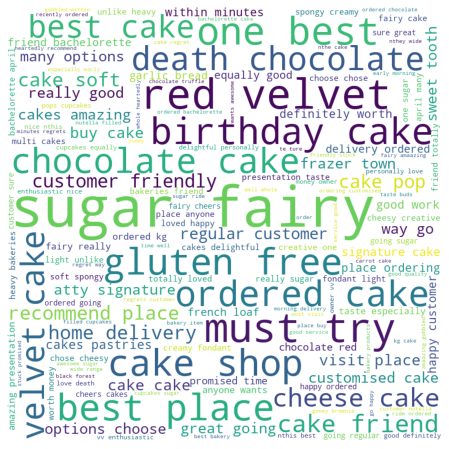

In [ ]:
reviewwords('Bakery')

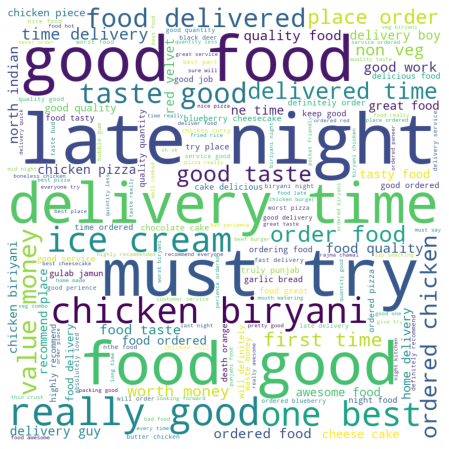

In [ ]:
reviewwords('Takeaway, Delivery')

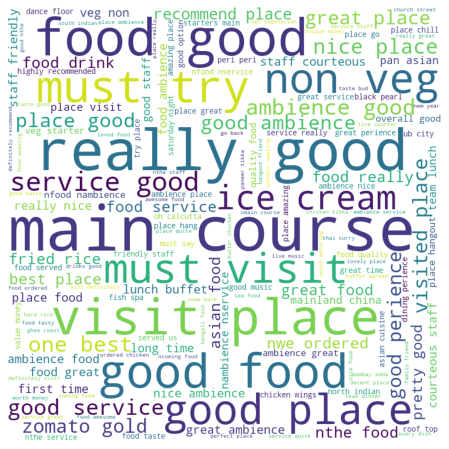

In [ ]:
reviewwords('Casual Dining, Bar')

In [ ]:
fig = px.bar(x=df['city'].unique(), y=df['city'].value_counts(), labels=dict(x='City Name', y='Total Count'), color_continuous_scale='Agsunset', color=df['city'].unique())
fig.update_layout(title='Location Wise Counts For Restaurants', titlefont={'size':30}, template='simple_white')
fig.update_traces(marker_line_color='black', marker_line_width=2, opacity=1)
fig.show()

In [ ]:
df2 = df.copy()
df2.dropna(how='any', inplace=True)

In [ ]:
#!pip install plotly --upgrade

In [ ]:
fig=px.histogram(df['type'],labels=dict(value='Type'))
fig.update_layout(title="Type of Services",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [ ]:
fig=px.histogram(df['cost'],labels=dict(value='Cost Range'),nbins=10)
fig.update_layout(title="Cost of Restaurants",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [ ]:
loc_plt = pd.crosstab(df2['rating'], df2['city'])
fig = px.bar(loc_plt, x=loc_plt.index, y=loc_plt.columns, barmode='stack', opacity=1)
fig.update_layout(title='Location Wise Rating', titlefont={'size': 30}, template='simple_white')
fig.update_traces(marker_line_color='black', marker_line_width=0.5, opacity=0.8)
fig.show()

In [ ]:
chains = df['name'].value_counts()[:10]
fig = px.bar(y=chains, x=chains.index, labels=dict(x='Name', y='Count'), color_continuous_scale='Agsunset', color=chains.index)
fig.update_layout(title='Most Famous Restaurant Chains', titlefont={'size': 30}, template='simple_white')
fig.update_traces(marker_line_color='black', marker_line_width=2, opacity=1)
fig.show()

In [ ]:
df2.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
rating          0
dtype: int64

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 12.6 MB/s 
     |████████████████████████████████| 1.3 MB 69.5 MB/s 
     |████████████████████████████████| 167 kB 57.1 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 1.7 MB 51.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 6.8 MB 52.3 MB/s 
     |████████████████████████████████| 2.0 MB 58.7 MB/s 
     |████████████████████████████████| 15.5 MB 33.9 MB/s 
     |████████████████████████████████| 261 kB 75.3 MB/s 
     |████████████████████████████████| 113 kB 35.3 MB/s 
     |████████████████████████████████| 303 kB 67.9 MB/s 
     |████████████████████████████████| 62 kB 915 kB/s 
     |████████████████████████████████| 102 kB 12.7 MB/s 
     |██████████████████

***IMPORTING PYCARET LIBRARY. PYCARET IS AN OPEN-SOURCE, LOW-CODE MACHINE LEARNING LIBRARY IN PYTHON THAT ALLOWS YOU TO GO FROM PREPARING THE DATA TO DEPLOYMENT OF THE MDOEL WITHIN MINUTES IN YOUR CHOICE OF NOTEBOOK ENVIRONMENT*** 

In [ ]:
from pycaret.regression import *
from pycaret import regression

In [ ]:
my_data = Zom_df.iloc[:, [3,4,6,8,9,11,12,14,17]]
my_data.to_csv('Zomato_df.csv')
my_data.head()

online_order  book_table  votes  location  rest_type  cuisines   cost  \
0             0           0    775         0          0         0  800.0   
1             0           1    787         0          0         1  800.0   
2             0           1    918         0          1         2  800.0   
3             1           1     88         0          2         3  300.0   
4             1           1    166         1          0         4  600.0   

   menu_item  rating  
0          0     4.1  
1          0     4.1  
2          0     3.8  
3          0     3.7  
4          0     3.8

In [ ]:
exp = regression.setup(data=my_data, target='rating', session_id=101, silent=True)

Description             Value
0                               session_id               101
1                                   Target            rating
2                            Original Data        (43942, 9)
3                           Missing Values              True
4                         Numeric Features                 6
5                     Categorical Features                 2
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (30759, 8)
10                    Transformed Test Set        (13183, 8)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              0737
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [ ]:
# Applying Random Forest Regressor with 10 k-folds
regression_rf = regression.create_model('rf')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0701  0.0265  0.1627  0.9662  0.0454  0.0214
1     0.0690  0.0239  0.1545  0.9682  0.0446  0.0209
2     0.0700  0.0317  0.1780  0.9655  0.0619  0.0207
3     0.0729  0.0354  0.1880  0.9562  0.0612  0.0221
4     0.0680  0.0254  0.1594  0.9721  0.0440  0.0207
5     0.0703  0.0259  0.1608  0.9711  0.0527  0.0207
6     0.0710  0.0253  0.1592  0.9712  0.0457  0.0215
7     0.0641  0.0179  0.1340  0.9814  0.0324  0.0197
8     0.0720  0.0324  0.1799  0.9619  0.0597  0.0214
9     0.0725  0.0243  0.1560  0.9729  0.0475  0.0220
Mean  0.0700  0.0269  0.1632  0.9687  0.0495  0.0211
SD    0.0024  0.0048  0.0146  0.0065  0.0089  0.0007

In [ ]:
# List of all models with their respective MAE, MSE, RMSE, R2, RMSLE, MAPE, TT (Sec) 

top3 = compare_models(n_select=3, exclude=['lightgbm', 'mlp'])

Model     MAE      MSE    RMSE       R2   RMSLE  \
rf          Random Forest Regressor  0.0700   0.0269  0.1632   0.9687  0.0495   
et            Extra Trees Regressor  0.0547   0.0271  0.1639   0.9686  0.0529   
dt          Decision Tree Regressor  0.0588   0.0434  0.2077   0.9495  0.0601   
gbr     Gradient Boosting Regressor  0.2150   0.0965  0.3106   0.8879  0.0763   
ada              AdaBoost Regressor  0.3047   0.1531  0.3911   0.8223  0.1202   
knn           K Neighbors Regressor  0.3174   0.3987  0.6312   0.5380  0.2570   
br                   Bayesian Ridge  0.5094   0.7649  0.8740   0.1163  0.3484   
lar          Least Angle Regression  0.5095   0.7649  0.8740   0.1163  0.3484   
ridge              Ridge Regression  0.5095   0.7649  0.8740   0.1163  0.3484   
lr                Linear Regression  0.5095   0.7649  0.8740   0.1163  0.3484   
en                      Elastic Net  0.5235   0.7921  0.8895   0.0846  0.3513   
lasso              Lasso Regression  0.5235   0.7921  0.8895   0.0845  0.3513   
omp     Orthogonal Matching Pursuit  0.5265   0.7986  0.8930   0.0772  0.3520   
llar   Lasso Least Angle Regression  0.5605   0.8660  0.9299  -0.0006  0.3591   
dummy               Dummy Regressor  0.5605   0.8660  0.9299  -0.0006  0.3591   
huber               Huber Regressor  0.6374   0.9436  0.9703  -0.0894  0.3584   
par    Passive Aggressive Regressor  2.1854  23.3557  3.8469 -24.8864  0.5752   

         MAPE  TT (Sec)  
rf     0.0211     6.947  
et     0.0161     3.418  
dt     0.0174     0.122  
gbr    0.0652     2.051  
ada    0.0839     0.348  
knn    0.0696     0.254  
br     0.0953     0.026  
lar    0.0953     0.022  
ridge  0.0953     0.021  
lr     0.0953     0.023  
en     0.0983     0.023  
lasso  0.0983     0.024  
omp    0.0988     0.020  
llar   0.1067     0.021  
dummy  0.1067     0.017  
huber  0.1358     0.411  
par    0.5562     0.113

In [ ]:
rf = create_model('rf', fold = 5, verbose=False)    # create_model will create model of random forest regressor with 5 folds
et = create_model('et', fold = 5, verbose=False)    # create_model will create model of extract tree regressor with 5 folds
dt = create_model('dt', fold=5, verbose=False)      # create_model will create model of decision tree regressor with 5 folds

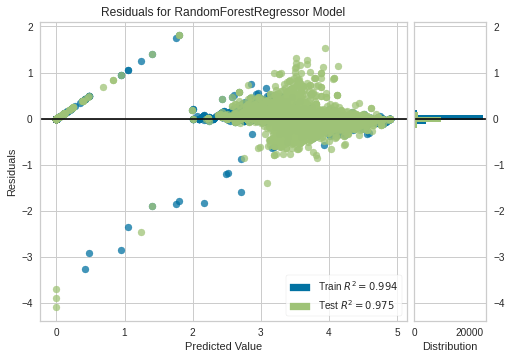

In [ ]:
plot_model(rf, plot='residuals')

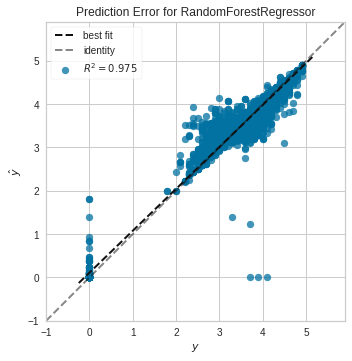

In [ ]:
plot_model(rf, plot='error')

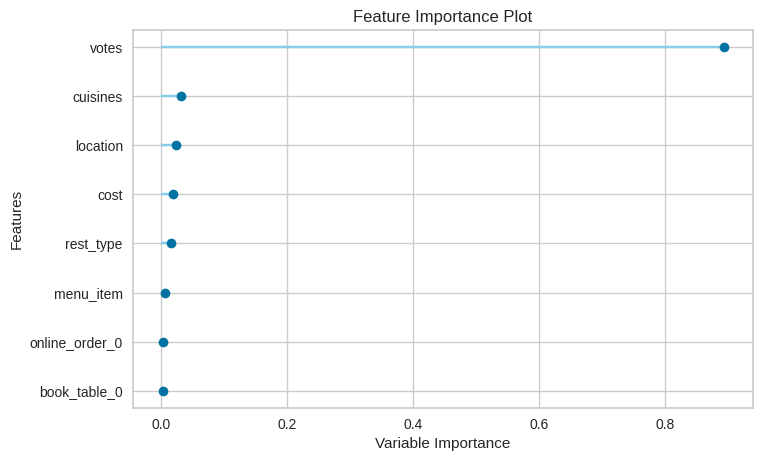

In [ ]:
plot_model(rf, plot='feature')

In [ ]:
plot_model(rf, plot='parameter')

Parameters
bootstrap                      True
ccp_alpha                       0.0
criterion                       mse
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                    101
verbose                           0
warm_start                    False

***TERM FREQUENCY INVERSE DOCUMENT FREQUENCY ALGORITHM HELPS TO TRANSFORM TEXT INTO A MEANINGFUL REPRESENTATION OF NUMBERS WHICH IS USED TO FIT MACHINE LEARNING ALGORITHM FOR PREDICTION***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df2.head()

url  ... rating
0  https://www.zomato.com/bangalore/jalsa-banasha...  ...    4.1
1  https://www.zomato.com/bangalore/spice-elephan...  ...    4.1
2  https://www.zomato.com/SanchurroBangalore?cont...  ...    3.8
3  https://www.zomato.com/bangalore/addhuri-udupi...  ...    3.7
4  https://www.zomato.com/bangalore/grand-village...  ...    3.8

[5 rows x 18 columns]

In [ ]:
df2.reset_index(inplace=True)
df2.head()

index  ... rating
0      0  ...    4.1
1      1  ...    4.1
2      2  ...    3.8
3      3  ...    3.7
4      4  ...    3.8

[5 rows x 19 columns]

***CONTENT BASED FILTERING***

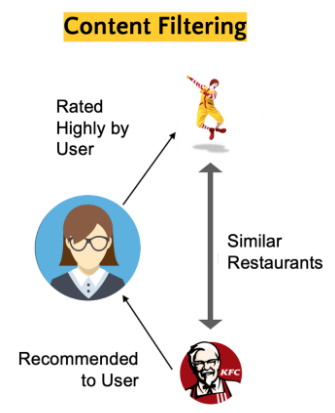

In [ ]:
tf=TfidfVectorizer(stop_words='english')

In [ ]:
tf_mat=tf.fit_transform(df2['cuisines'])

In [ ]:
tf_mat.shape

(23193, 103)

***COSINE SIMILARITY MEASURES THE SIMILARITY BETWEEN TWO VECTORS OF AN INNER PRODUCT SPACE. IT IS MEASURED BY THE COSINE OF THE ANGLE BETWEEN TWO VECTORS AND DETERMINES WHETHER TWO VECTORS ARE POINTING IN THE SAME DIRECTION.***

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim = cosine_similarity(tf_mat)

In [ ]:
similar=cosine_sim[3].tolist()

In [ ]:
ind=[]
val=[]
for i in range(len(similar)):
    ind.append(i)
    val.append(similar[i])

In [ ]:
dic={'index':ind,'value':val}
rec_df=pd.DataFrame(dic)

In [ ]:
rec=rec_df.merge(df2, on='index')
rec.head(10)

index     value  ...          city rating
0      0  0.353021  ...  Banashankari    4.1
1      1  0.344272  ...  Banashankari    4.1
2      2  0.000000  ...  Banashankari    3.8
3      3  1.000000  ...  Banashankari    3.7
4      4  0.280245  ...  Banashankari    3.8
5      5  0.743543  ...  Banashankari    3.8
6      7  0.000000  ...  Banashankari    4.6
7      8  0.000000  ...  Banashankari    4.0
8      9  0.000000  ...  Banashankari    4.2
9     10  0.000000  ...  Banashankari    4.1

[10 rows x 20 columns]

In [ ]:
a=rec.sort_values(by='value',ascending=False).head(7)

In [ ]:
 print(a['name'])     # Results based on the content ("name") will be shown to the user

6714                           Fujan
2050    Monsoon - The Park Bangalore
4091                     D View Cafe
5716          Gobble Up Churros Cafe
104               Vietnamese Kitchen
1939            The Square - Novotel
9235               Kapoor'S Biriyani
Name: name, dtype: object


In [ ]:
print(a['cuisines'])  # Results based on the content ("cuisines") will be shown to the user

6714                          Chinese, Thai, Seafood
2050                           Italian, North Indian
4091               Cafe, Italian, Chinese, Beverages
5716      Beverages, Cafe, Desserts, Spanish, Bakery
104                                       Vietnamese
1939    Continental, North Indian, Japanese, Italian
9235                           Biryani, North Indian
Name: cuisines, dtype: object


In [ ]:
print(a['dish_liked'])  # Results based on the content ("dish_liked") will be shown to the user

6714                                       Chicken Noodle
2050    Salads, Brownie, Cheesecake, Salad, Biryani, D...
4091    Chicken Lollipop, Dragon Rolls, Pasta Alfredo,...
5716                                   Churros, Empanadas
104           Pho, Papaya Salad, Coffee, Veg Momos, Rolls
1939    Breakfast Buffet, Cocktails, Sunday Brunch, No...
9235                            Raita, Hyderabadi Biryani
Name: dish_liked, dtype: object


In [ ]:
print(a['rest_type']) # Results based on the content ("rest_type") will be shown to the user

6714        Casual Dining
2050          Fine Dining
4091    Cafe, Quick Bites
5716        Casual Dining
104         Casual Dining
1939          Fine Dining
9235          Quick Bites
Name: rest_type, dtype: object


***ITEM-BASED COLLABORATIVE FILTERING APPROACH***

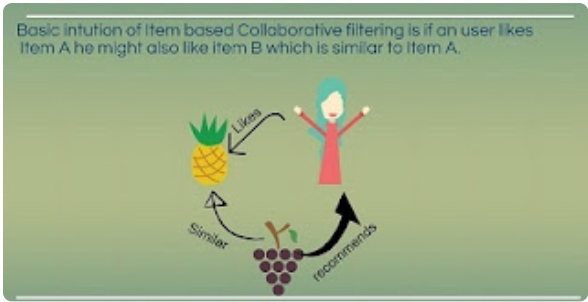

In [ ]:
rest_mat = rec.pivot(values='rating', index='name', columns='index').fillna(0)
rest_mat.head(10)

index                                 0      1      2      ...  23190  23191  23192
name                                                       ...                     
#L-81 Cafe                              0.0    0.0    0.0  ...    0.0    0.0    0.0
#Refuel                                 0.0    0.0    0.0  ...    0.0    0.0    0.0
1000 B.C                                0.0    0.0    0.0  ...    0.0    0.0    0.0
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    0.0    0.0    0.0  ...    0.0    0.0    0.0
1131 Bar + Kitchen                      0.0    0.0    0.0  ...    0.0    0.0    0.0
12Th Main - Grand Mercure               0.0    0.0    0.0  ...    0.0    0.0    0.0
1441 Pizzeria                           0.0    0.0    0.0  ...    0.0    0.0    0.0
154 Breakfast Club                      0.0    0.0    0.0  ...    0.0    0.0    0.0
1722 Urban Bistro                       0.0    0.0    0.0  ...    0.0    0.0    0.0
1947                                    0.0    0.0    0.0  ...    0.0    0.0    0.0

[10 rows x 10223 columns]

In [ ]:
rest_mat_new = rest_mat.reset_index()

In [ ]:
rest_mat_new.head(10)

index                                  name    0    1  ...  23190  23191  23192
0                                #L-81 Cafe  0.0  0.0  ...    0.0    0.0    0.0
1                                   #Refuel  0.0  0.0  ...    0.0    0.0    0.0
2                                  1000 B.C  0.0  0.0  ...    0.0    0.0    0.0
3      100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  0.0  0.0  ...    0.0    0.0    0.0
4                        1131 Bar + Kitchen  0.0  0.0  ...    0.0    0.0    0.0
5                 12Th Main - Grand Mercure  0.0  0.0  ...    0.0    0.0    0.0
6                             1441 Pizzeria  0.0  0.0  ...    0.0    0.0    0.0
7                        154 Breakfast Club  0.0  0.0  ...    0.0    0.0    0.0
8                         1722 Urban Bistro  0.0  0.0  ...    0.0    0.0    0.0
9                                      1947  0.0  0.0  ...    0.0    0.0    0.0

[10 rows x 10224 columns]

***IMPORTING THE SCIPY's LIBRARY FOR CREATING A MATRIX. csr_matrix() HELPS TO CREATE A SPARSE MATRIX OF A COMPRESSED SPACE ROW FORMAT.***

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
vec_rest_mat = csr_matrix(rest_mat.values)

***IMPORTING K-NEAREST NEIGHBORS***

In [ ]:
from sklearn.neighbors import NearestNeighbors

***K-NN IS A PERFECT CHOICE AND ALSO A VERY GOOD BASELINE FOR RECOMMENDER SYSTEM DEVELOPMENT. RELIES ON ITEM FEATURE SIMILARITY. WHEN K-NN MAKES AN INFERENCE ABOUT A RESTAURANT, IT WILL CALCULATE DISTANCE BETWEEN TARGET RESTAURANT AND EVERY OTHER RESTAURANT IN ITS DATASET, THEN IT RANKS ITS DISTANCES AND RETURNS TOP K NEAREST NEIGHBOR RESTAURANTS AS THE MOST SIMILAR RESTAURANT RECOMMENDATIONS***

In [ ]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(vec_rest_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

***BELOW CODE WILL HAVE OUTPUT OF SOME RECOMMENDED RESTAURANTS ACCORDING TO USER's SELECTION OF RESTAURANTS***

In [ ]:
randomChoice = np.random.choice(rest_mat.shape[0])
distances, indices = knn.kneighbors(rest_mat.iloc[randomChoice].values.reshape(1, -1), n_neighbors = 5)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Restaurant {0} on priority basis:\n'.format(rest_mat.index[randomChoice]))
    else:
        print('{0}: {1}'.format(i, rest_mat.index[indices.flatten()[i]]))

Recommendations for Restaurant Grills & Rolls on priority basis:

1: Punjab Bistro
2: Pulimunchi
3: Punjab Di Shaan
4: Punjabi By Nature 2.0


In [ ]:
train = Zom_df.iloc[:, [3,4,6,8,9,11,12,14]]
train.head()

online_order  book_table  votes  ...  cuisines   cost  menu_item
0             0           0    775  ...         0  800.0          0
1             0           1    787  ...         1  800.0          0
2             0           1    918  ...         2  800.0          0
3             1           1     88  ...         3  300.0          0
4             1           1    166  ...         4  600.0          0

[5 rows x 8 columns]

In [ ]:
train['cost'].fillna(train['cost'].mean(), inplace=True)

In [ ]:
target = Zom_df['rating']
target

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rating, Length: 43942, dtype: float64

***TIME TO TEST THE PERFORMANCE METRICS OF A MACHINE LEARNING MODEL***

In [ ]:
from sklearn.ensemble import RandomForestRegressor    # Testing results on Random Forest Regression
from sklearn.model_selection import train_test_split    # Performing train-test split on the data
from sklearn.metrics import r2_score  # R2 (R-Squared) is a statistical measure that represents the proportion of the variance for a dependant variable that's explained by an independant variable or variables in a regression model

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=10)  # splitting train and test data into 80/20 ratio

rf_model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=.0001)  # Hyperparametering tuning
rf_model.fit(X_train, y_train)      # Fitting model
y_predict = rf_model.predict(X_test)    # Predicting the results on independant features
r2_score(y_predict, y_test)   # Will get R2 score

0.9632911196944476

***TIME TO SAVE MODEL. FOR THAT I USED PICKLE. PIKLE ALLOWS SERIALIZING AND DE-SERIALIZING PYTHON OBJECTS. THIS CONVERTS PYTHON OBJECTS LIKE LISTS, DICTIONARIES,ETC INTO BYTE STREAMS (ZEROS AND ONES). YOU CAN CONVERT BYTE STREAMSBACK INTO PYTHON OBJECTS THROUGH A PROCESS CALLED UNPICKLING. PICKLING IS ALOS KNOWN AS SERIALIZATION, FLATTENING OR MARSHALLING.***

In [ ]:
import pickle
pickle.dump(rf_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

***INSTALLING FLASK_NGROK PACKAGE FOR DEPLOYING MODEL ON WEB SERVER.***

In [ ]:
!pip install flask_ngrok

In [ ]:
from google.colab import files    # Uploading files from PC to Google Colab

uploaded = files.upload()

for filename in uploaded.keys():
    print(uploaded[filename])

Saving templates.zip to templates (2).zip
b'PK\x03\x04\x14\x00\x00\x00\x08\x00;pxS\x9f\xbc^\xcan\x03\x00\x00\xd7\x08\x00\x00\x13\x00\x00\x00templates/index.xml\xb5Vmo\xdb6\x10\xfe\x9c\x00\xf9\x0fW\x02\x8b\x1b\xb4\xb2\xec\xa4\xe9\x1aOr\xd1\xa5+V \x81\xb3\xd6\x1b\xd0})(\x8a\x96\xb8P$GRq\x9d \xff}G\xd1n\x12\x15\x01:\x03\xb5a\xe8tw|\xee\x85\xcf\x91\x06\x80\xbd\xdd\xec\xc9\xdb\xd9\xe9\xfc\xd3\xc5oP\xfbFNQ\x11\x9e\xd0\t\x9c\x96\xf8\x04\xc8\x1a\xee)\xb0\x9aZ\xc7}N\xfe\x9c\xbfK^\x91h\xf1\xc2K>\x9dkO%\xbc\xa5\xe8\xf5\x91\t\xae\x18\xcf\xd2h\xe9\x9c\xa4P\x97P[\xbe\xc8\x07\xb5\xf7\xc6M\xd2t\xa1\x95w\xc3J\xebJrj\x84\x1b2\xdd\xa4\xcc\xb9\xd7\x0b\xda\x08\xb9\xca/(\x13\x0b\xc1\xf4\x00,\x97\xf9\xc0\xf9\x95\xe4\xae\xe6\xdc\x0f\xc0\xaf\x0c\xcf\x07\x9e\x7f\xf1a\xc1 d\xbaE\x807V4?\x0e\xfdw\xa1\xca\xc9\xd1h\xf4\xc3\x02\xcc\x0cW\xcf>R\xe5\x9e\x9djUr\xe5\xf8\xff\x8d\x17\x1c\xc9\x9d#\x89\t\x90\x9b\x1bh\xad\xfc\xbc\xd0\xf6)\xc2P/\xd8\xe09,\x84\xe4\x8a6\x88\x83\x10i\xb7h\x18\xc0\x0e\xe0\xf66\x12\x01Q\xd35_P,t\xb

In [ ]:
import zipfile
from zipfile import ZipFile     # Extracting the zip file

file_name = '/content/templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

Extracted Successfully


In [ ]:
from google.colab import files    # Uploading files from PC to Google Colab

uploaded = files.upload()

for filename in uploaded.keys():
    print(uploaded[filename])

Saving style.css to style (1).css
b"   \r\n@import url(https://fonts.googleapis.com/css?family=Open+Sans);\r\n.btn { display: inline-block; *display: inline; *zoom: 1; padding: 4px 10px 4px; margin-bottom: 0; font-size: 13px; line-height: 18px; color: #f70202; text-align: center;text-shadow: 0 1px 1px rgba(255, 255, 255, 0.75); vertical-align: middle; background-color: #f5f5f5; background-image: -moz-linear-gradient(top, #ffffff, #e6e6e6); background-image: -ms-linear-gradient(top, #ffffff, #e6e6e6); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#ffffff), to(#e6e6e6)); background-image: -webkit-linear-gradient(top, #ffffff, #e6e6e6); background-image: -o-linear-gradient(top, #ffffff, #e6e6e6); background-image: linear-gradient(top, #ffffff, #e6e6e6); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#ffffff, endColorstr=#e6e6e6, GradientType=0); border-color: #e6e6e6 #e6e6e6 #e6e6e6; border-color: rgba(248, 42, 42, 1) rgba(0, 0

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.xml')


@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    features = [int(x) for x in request.form.values()]
    final_features = [np.array(features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 1)

    return render_template('index.xml', prediction_text='Predict Zomato Restaurant Ratings : {}'.format(output))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3413-34-73-0-32.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Dec/2021 23:49:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 23:49:21] "GET /static/css/style.css HTTP/1.1" 404 -
127.0.0.1 - - [06/Dec/2021 23:49:22] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Dec/2021 23:49:32] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 23:49:32] "GET /static/css/style.css HTTP/1.1" 404 -


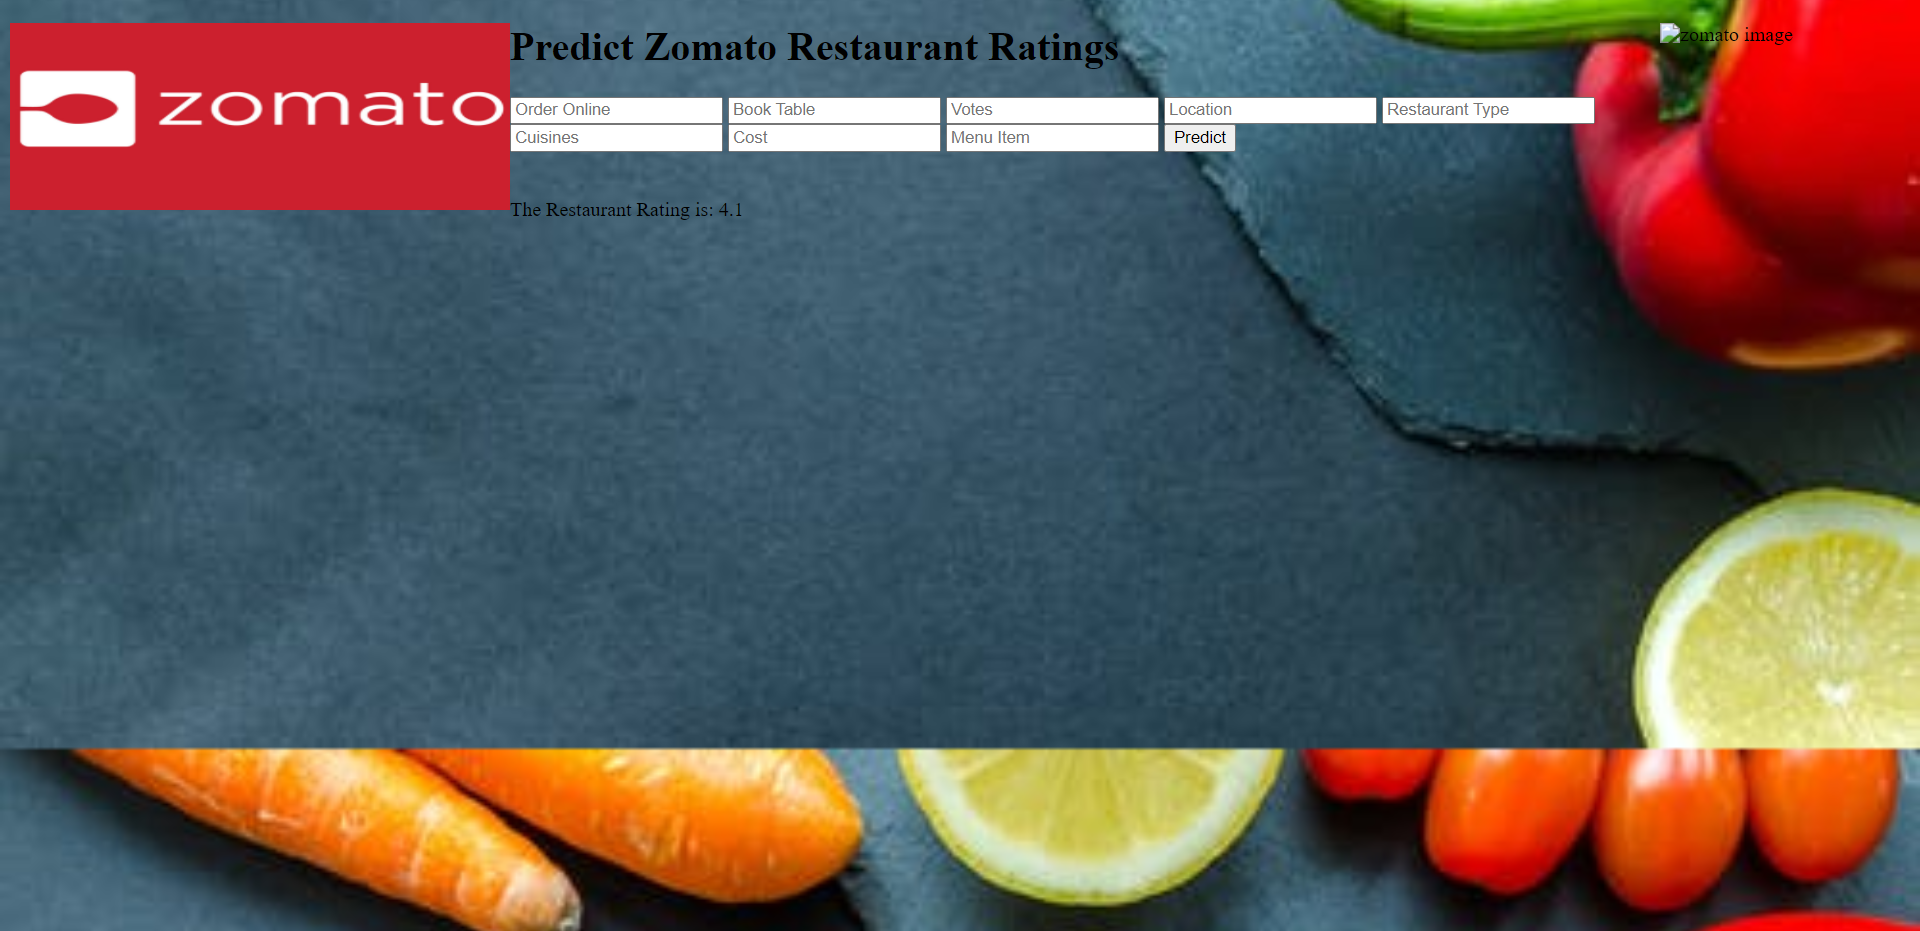